In [1]:
# ---------------------------------------------
# 1. Setup: Mount Google Drive and Navigate
# ---------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the repo folder
%cd /content/drive/MyDrive/Spring2025/"summer 25"/pytorch_intro_s25/images


Mounted at /content/drive
/content/drive/MyDrive/Spring2025/summer 25/pytorch_intro_s25/images


In [2]:
# ---------------------------------------------
# 2. List Image Files in the Folder
# ---------------------------------------------
import os

image_files = [f for f in os.listdir() if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} image files:")
print(image_files)


Found 10 image files:
['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_101.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg']


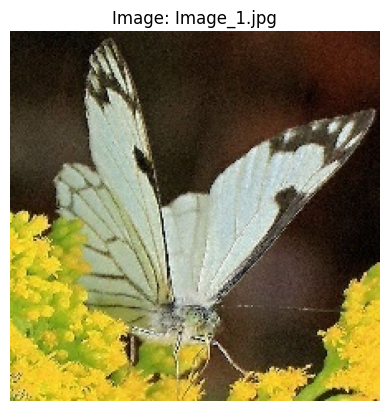

Size: (224, 224), Mode: RGB


In [3]:
# ---------------------------------------------
# 3. Load and Visualize Images with PIL and matplotlib
# ---------------------------------------------
from PIL import Image
import matplotlib.pyplot as plt

# Load one image
img_path = image_files[0]
img = Image.open(img_path)

# Show image
plt.imshow(img)
plt.title(f"Image: {img_path}")
plt.axis('off')
plt.show()

# Image details
print(f"Size: {img.size}, Mode: {img.mode}")


In [4]:
# ---------------------------------------------
# 4. Convert Image to Tensor using torchvision
# ---------------------------------------------
import torchvision.transforms as transforms
import torch

# Transform: PIL to Tensor (automatically converts to [0, 1] float)
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)

print(f"Tensor shape: {img_tensor.shape}")
print(f"Tensor min: {img_tensor.min()}, max: {img_tensor.max()}")


Tensor shape: torch.Size([3, 224, 224])
Tensor min: 0.0, max: 1.0


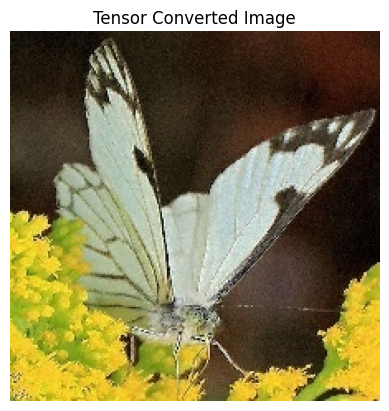

In [5]:
# ---------------------------------------------
# 5. Visualize Tensor Image
# ---------------------------------------------
# Convert tensor back to numpy for display
img_np = img_tensor.permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]

plt.imshow(img_np)
plt.title("Tensor Converted Image")
plt.axis('off')
plt.show()


In [6]:
# ---------------------------------------------
# 6. Normalize Image Tensor (Standardization)
# ---------------------------------------------
# Dummy example with mean and std = 0.5 per channel
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])

img_normalized = normalize(img_tensor)

print(f"Normalized Tensor: min={img_normalized.min()}, max={img_normalized.max()}")


Normalized Tensor: min=-1.0, max=1.0


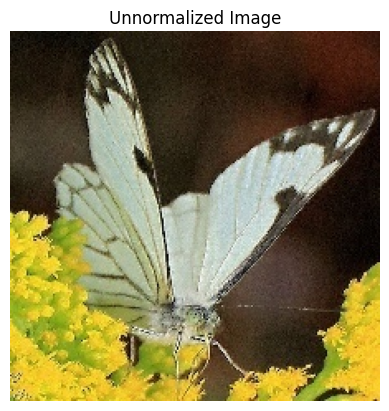

In [7]:
# ---------------------------------------------
# 7. Convert Back to Visualizable Image
# (De-normalization just for display)
# ---------------------------------------------
# Unnormalize
unnormalize = transforms.Normalize(mean=[-1, -1, -1],
                                   std=[2, 2, 2])
img_unnorm = unnormalize(img_normalized)

# Convert to numpy and plot
plt.imshow(img_unnorm.permute(1, 2, 0).clamp(0, 1).numpy())
plt.title("Unnormalized Image")
plt.axis('off')
plt.show()


Dataset size: 10


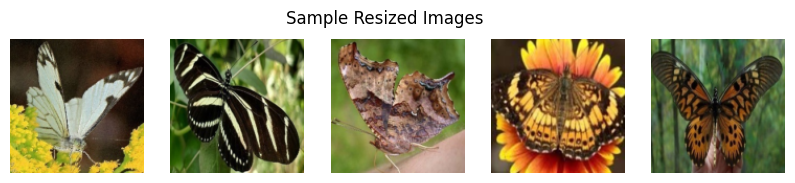

In [12]:
# ---------------------------------------------
# 8. Batch Load Images using torchvision.datasets (Optional)
# ---------------------------------------------
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_list = [os.path.join(img_dir, f) for f in os.listdir(img_dir)
                         if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

transform_pipeline = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = CustomImageDataset('./', transform=transform_pipeline)
print(f"Dataset size: {len(dataset)}")

# Plot a few
plt.figure(figsize=(10, 2))
for i in range(5):
    img = dataset[i].permute(1, 2, 0)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Sample Resized Images")
plt.show()
